<a href="https://colab.research.google.com/github/Nimisha-Nooti/hotel-data-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data science/module 1/capstone project/Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

In [4]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We can notice that maximum columns has non-null values by using 'info()' method. There are 4 columns('country', 'children', 'agent, 'company') with null values. Hence, sort the non-null values in rows of that columns. so that, working on data can be made flexible. 

In [7]:
hotel_df.isna().sum().sort_values(ascending = False).head()

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [8]:
new_hotel_df = hotel_df.copy()

In [11]:
# sorting null values of the above 4 columns 
No_Null_company_df = new_hotel_df[~new_hotel_df['company'].isna()]
No_Null_company_df.shape

(6797, 32)

In [13]:
No_Null_agent_df = new_hotel_df[~new_hotel_df['agent'].isna()]
No_Null_agent_df.shape

(103050, 32)

In [14]:
No_Null_country_df = new_hotel_df[~new_hotel_df['country'].isna()]
No_Null_country_df.shape

(118902, 32)

In [15]:
No_Null_children_df = new_hotel_df[~new_hotel_df['children'].isna()]
No_Null_children_df.shape

(119386, 32)

#***Visualization***:

In [27]:
type_of_hotels = hotel_df['hotel'].value_counts()
type_of_hotels

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [29]:
type_of_hotels.index

Index(['City Hotel', 'Resort Hotel'], dtype='object')

Text(0.5, 1.0, 'Types of hotels')

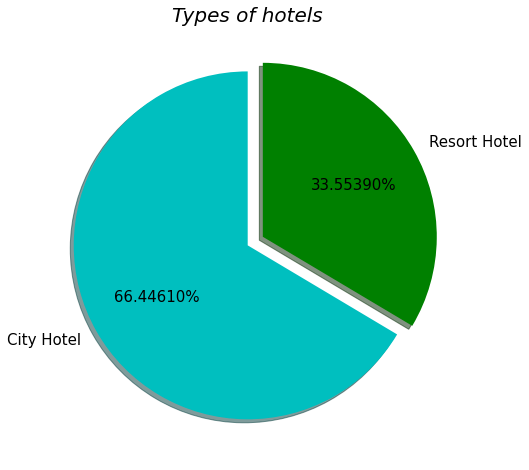

In [79]:
plt.rcParams['figure.figsize'] = (15, 8)

explode = (0, 0.1)
plt.pie(type_of_hotels, explode, autopct='%1.5f%%', colors = ['c','g'], 
        shadow=True, startangle=90, labels = type_of_hotels.index, textprops={'fontsize': 15} )
plt.title('Types of hotels', fontsize = 20, fontstyle = 'italic')




### There are 66.4% of City Hotels and 33.5% of Resort Hotels available 

In [76]:
cancellation_details = hotel_df.groupby('hotel')['is_canceled'].value_counts()
cancellation_details

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Percentage of bookings that are canceled at diffrent type of hotels')

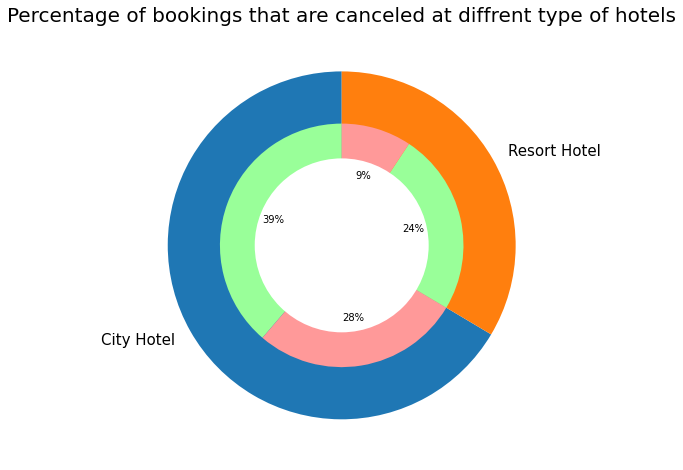

In [116]:
plt.pie(type_of_hotels, startangle=90,frame=True, labels = type_of_hotels.index, textprops={'fontsize': 15})
plt.pie(cancellation_details,radius=0.70,autopct='%1.0f%%',startangle=90, colors = ['#99ff99', '#ff9999'])

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
plt.gcf().gca().add_artist(centre_circle)

plt.title('Percentage of bookings that are canceled at diffrent type of hotels', fontsize=20)

###we can observe from the above pie visualization that the max bookings and cancelations are happening in city hotel.
total bookings that are canceled = (28%+9%) = 37%

total bookings that are not cancled = (39%+24%) = 63%
1.   green = bookings not cancelled
2.   pink = bookings cancelled


###Hotel Bookings based on meals: 

- RO: Room only

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Beakfast, Lunch and Dinner)

- AI: All Inclusive (all services of full board plus any others specified in each case)

In [46]:
bookings_based_on_meals = hotel_df['meal'].value_counts()
bookings_based_on_meals

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0.5, 1.0, 'Hotel Bookings Based On Meals')

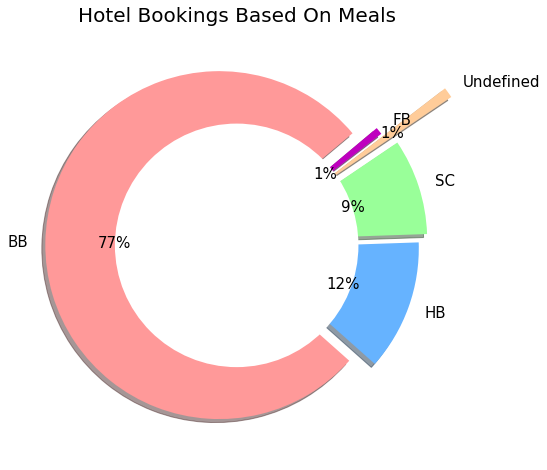

In [73]:
# visualization of Hotel Bookings Based on Meals:
centre_circle = plt.Circle((0,0),0.70,fc='white')

plt.pie(bookings_based_on_meals, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'm'], explode = (0.1,0.05,0.1,0.5,0.05), labels=bookings_based_on_meals.index, 
        textprops={'fontsize': 15}, autopct='%1.0f%%', startangle=40, shadow=True)

plt.gcf().gca().add_artist(centre_circle)
plt.title('Hotel Bookings Based On Meals', fontsize=20)

###From the above pie visualization we can conclude that 77% of Hotel Bookings are of 'BB' meal type i.e, 'BB: Bed & Breakfast'